In [35]:
import pandas as pd

file_path = 'Womens Clothing.csv'
data = pd.read_csv(file_path)

#display the first few rows and general information about the dataset
data.head(), data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


(   Unnamed: 0  Clothing ID  Age                    Title  \
 0           0          767   33                      NaN   
 1           1         1080   34                      NaN   
 2           2         1077   60  Some major design flaws   
 3           3         1049   50         My favorite buy!   
 4           4          847   47         Flattering shirt   
 
                                          Review Text  Rating  Recommended IND  \
 0  Absolutely wonderful - silky and sexy and comf...       4                1   
 1  Love this dress!  it's sooo pretty.  i happene...       5                1   
 2  I had such high hopes for this dress and reall...       3                0   
 3  I love, love, love this jumpsuit. it's fun, fl...       5                1   
 4  This shirt is very flattering to all due to th...       5                1   
 
    Positive Feedback Count   Division Name Department Name Class Name  
 0                        0       Initmates        Intimate  Inti

In [27]:
data.isna().sum()

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [6]:
#drop the unnecessary column
data_cleaned = data.drop(columns=['Unnamed: 0'])

#fill missing values
data_cleaned['Title'].fillna("Tidak Ada", inplace=True)
data_cleaned['Review Text'].fillna("Tidak Ada", inplace=True)
data_cleaned['Division Name'].fillna("Unknown", inplace=True)
data_cleaned['Department Name'].fillna("Unknown", inplace=True)
data_cleaned['Class Name'].fillna("Unknown", inplace=True)

In [10]:
#convert relevent columnts to category type
category_colums = ["Division Name","Department Name","Class Name"]
for col in category_colums:
    data_cleaned[col] = data_cleaned[col].astype("category")
    
#veryfy data types and check for remaining missing value
data_cleaned.info(), data_cleaned.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Clothing ID              23486 non-null  int64   
 1   Age                      23486 non-null  int64   
 2   Title                    23486 non-null  object  
 3   Review Text              23486 non-null  object  
 4   Rating                   23486 non-null  int64   
 5   Recommended IND          23486 non-null  int64   
 6   Positive Feedback Count  23486 non-null  int64   
 7   Division Name            23486 non-null  category
 8   Department Name          23486 non-null  category
 9   Class Name               23486 non-null  category
dtypes: category(3), int64(5), object(2)
memory usage: 1.3+ MB


(None,
 Clothing ID                0
 Age                        0
 Title                      0
 Review Text                0
 Rating                     0
 Recommended IND            0
 Positive Feedback Count    0
 Division Name              0
 Department Name            0
 Class Name                 0
 dtype: int64)

In [19]:
df = pd.DataFrame(data_cleaned)
print(df)

       Clothing ID  Age                                              Title  \
0              767   33                                          Tidak Ada   
1             1080   34                                          Tidak Ada   
2             1077   60                            Some major design flaws   
3             1049   50                                   My favorite buy!   
4              847   47                                   Flattering shirt   
...            ...  ...                                                ...   
23481         1104   34                     Great dress for many occasions   
23482          862   48                         Wish it was made of cotton   
23483         1104   31                              Cute, but see through   
23484         1084   28  Very cute dress, perfect for summer parties an...   
23485         1104   52                    Please make more like this one!   

                                             Review Text  Ratin

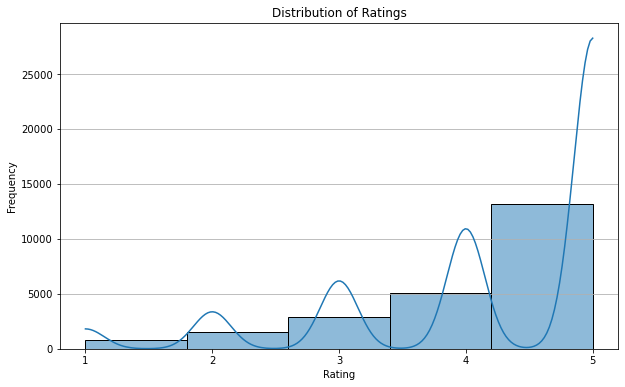

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

#Visualizing the distribution of ratings
plt.figure(figsize=(10, 6))
sns.histplot(df['Rating'], bins=5, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.xticks(range(1, 6))
plt.grid(axis='y')

plt.show()

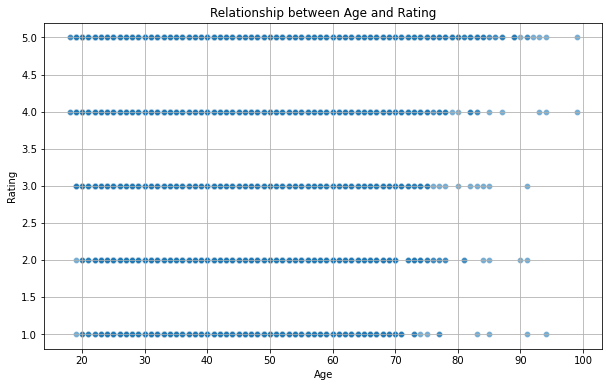

In [31]:
# Visualizing the relationship between Age and Rating
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='Rating', alpha=0.6)
plt.title('Relationship between Age and Rating')
plt.xlabel('Age')
plt.ylabel('Rating')
plt.grid()
plt.show()

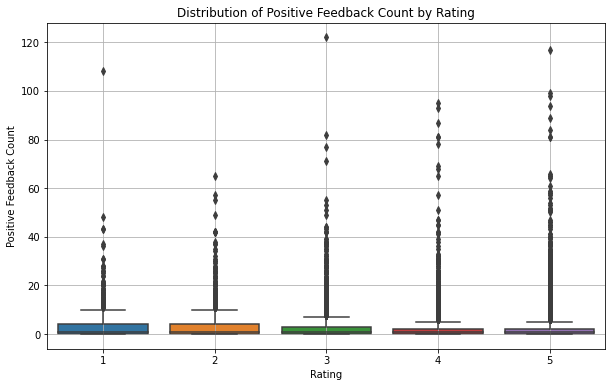

In [32]:
# Visualizing the distribution of Positive Feedback Count by Rating
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Rating', y='Positive Feedback Count')
plt.title('Distribution of Positive Feedback Count by Rating')
plt.xlabel('Rating')
plt.ylabel('Positive Feedback Count')
plt.grid()
plt.show()

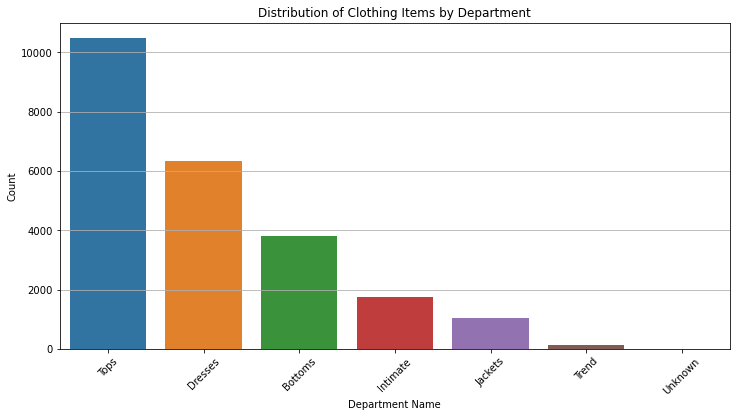

In [33]:
# Visualizing the distribution of clothing items across different departments
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Department Name', order=df['Department Name'].value_counts().index)
plt.title('Distribution of Clothing Items by Department')
plt.xlabel('Department Name')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()